<a href="https://colab.research.google.com/github/kaioschi/imersao_dados_4/blob/main/Imersao_dados_4_organizado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação de bibliotecas de dados iniciais

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
!pip install matplotlib --upgrade  # para usar métodos da versão mais recente do matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# base de dados de imóveis
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
dados = pd.read_csv(url)

# base contendo dados censitários
ibge_url = "https://gist.githubusercontent.com/tgcsantos/85f8c7b0a2edbc3e27fcad619b37d886/raw/a4954781e6bca9cb804062a3eea0b3b84679daf4/Basico_SP1.csv"
ibge = pd.read_csv(ibge_url)

In [ ]:
pd.set_option("display.precision", 2)  # deixando duas casas decimaisi na maioria dos números
pd.set_option('display.float_format', lambda x: '%.2f' % x)  # deixando duas casas decimais nos floats

# Tratamento e limpeza dos dados de imóveis

### Coluna Valor

In [ ]:
dados[["Moeda", "Valor_Temp", "Modalidade"]] = dados["Valor"].str.split(expand = True)  # separando a string de Valor em 3 novas colunas, para tratamento dos dados
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_Temp,Modalidade
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None


In [ ]:
dados["Valor"] = dados["Valor_Temp"].str.replace(".", "").astype(float)  # substituindo o . em Valor_Temp e convertendo para float
dados.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_Temp,Modalidade
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685000.00,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.00,R$,540.000,None


In [ ]:
dados.pop("Valor_Temp")  # removendo o Valor_Temp
dados.pop("Moeda")  # removendo Moeda

0        R$
1        R$
2        R$
3        R$
4        R$
         ..
10003    R$
10004    R$
10005    R$
10006    R$
10007    R$
Name: Moeda, Length: 10008, dtype: object

In [ ]:
dados["Modalidade"].unique()  # conferindo as entradas na coluna modalidade

array([None, '/Mês', '/Ano', '/Dia'], dtype=object)

In [ ]:
dados["Modalidade"] = dados["Modalidade"].str.replace("/Mês", "Aluguel Mensal", regex = True)  # substituindo as strings dos alugueis por algo mais descritivo
dados["Modalidade"] = dados["Modalidade"].str.replace("/Ano", "Aluguel Anual", regex = True)
dados["Modalidade"] = dados["Modalidade"].str.replace("/Dia", "Aluguel Diário", regex = True)

In [ ]:
dados["Modalidade"].fillna(value="Venda", inplace=True)  # substituindo o objeto python None por uma string

In [ ]:
dados["Modalidade"].unique()  # verificando as substituições

array(['Venda', 'Aluguel Mensal', 'Aluguel Anual', 'Aluguel Diário'],
      dtype=object)

### Coluna Bairro

In [ ]:
bairros_vazios = dados["Bairro"].isna()  # verificando que existem entradas vazias em Bairro
dados[bairros_vazios]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Modalidade
7263,"Rua Madalena de Morais, 3773",NaN,São Paulo,742,4,8,6,9800.00,Aluguel Mensal
7956,Rua Vergueiro,NaN,São Paulo,103,3,2,2,640000.00,Venda
7996,"Rua Alvorada do Sul, 3773",NaN,São Paulo,678,4,8,8,6895000.00,Venda
8126,"Rua Professor Eduardo Monteiro, 3773",NaN,São Paulo,550,3,5,6,4000000.00,Venda
8566,"Avenida Comendador Adibo Ares, 3773",NaN,São Paulo,694,4,6,6,3890000.00,Venda
8619,"Rua Alvorada do Sul, 3773",NaN,São Paulo,683,4,8,8,6895000.00,Venda
8739,"Rua Alvorada do Sul, 3773",NaN,São Paulo,683,4,8,8,6895000.00,Venda
8868,"Rua Professor Eduardo Monteiro, 3773",NaN,São Paulo,555,3,5,6,4000000.00,Venda
8943,"Rua Santo Eufredo, 3773",NaN,São Paulo,846,4,8,8,30000.00,Aluguel Mensal
8992,"Rua Professor Eduardo Monteiro, 3773",NaN,São Paulo,555,3,5,6,4000000.00,Venda


In [ ]:
dados["Bairro"].fillna(value="Sem Bairro", inplace = True)
dados[bairros_vazios]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Modalidade
7263,"Rua Madalena de Morais, 3773",Sem Bairro,São Paulo,742,4,8,6,9800.00,Aluguel Mensal
7956,Rua Vergueiro,Sem Bairro,São Paulo,103,3,2,2,640000.00,Venda
7996,"Rua Alvorada do Sul, 3773",Sem Bairro,São Paulo,678,4,8,8,6895000.00,Venda
8126,"Rua Professor Eduardo Monteiro, 3773",Sem Bairro,São Paulo,550,3,5,6,4000000.00,Venda
8566,"Avenida Comendador Adibo Ares, 3773",Sem Bairro,São Paulo,694,4,6,6,3890000.00,Venda
8619,"Rua Alvorada do Sul, 3773",Sem Bairro,São Paulo,683,4,8,8,6895000.00,Venda
8739,"Rua Alvorada do Sul, 3773",Sem Bairro,São Paulo,683,4,8,8,6895000.00,Venda
8868,"Rua Professor Eduardo Monteiro, 3773",Sem Bairro,São Paulo,555,3,5,6,4000000.00,Venda
8943,"Rua Santo Eufredo, 3773",Sem Bairro,São Paulo,846,4,8,8,30000.00,Aluguel Mensal
8992,"Rua Professor Eduardo Monteiro, 3773",Sem Bairro,São Paulo,555,3,5,6,4000000.00,Venda


In [ ]:
bairros_unicos = dados["Bairro"].unique()  # para dar uma explorada nos nomes dos bairros em ordem alfabética
bairros_unicos.sort()
bairros_unicos  # mas os bairros com acento no A ficaram em último

array(['Aclimação', 'Alto da Boa Vista', 'Alto da Lapa', 'Alto da Mooca',
       'Alto de Pinheiros', 'Aricanduva', 'Balneário Mar Paulista',
       'Barra Funda', 'Barro Branco (Zona Norte)', 'Bela Aliança',
       'Bela Vista', 'Belenzinho', 'Boaçava', 'Bom Retiro', 'Bortolândia',
       'Bosque da Saúde', 'Brasilândia', 'Brooklin', 'Brooklin Novo',
       'Brooklin Paulista', 'Brás', 'Burgo Paulista', 'Butantã',
       'Cambuci', 'Campininha', 'Campo Belo', 'Campo Grande',
       'Campos Elíseos', 'Canindé', 'Capela do Socorro', 'Capão Redondo',
       'Carandiru', 'Casa Verde', 'Casa Verde Alta', 'Catumbi',
       'Caxingui', 'Cerqueira César', 'Chora Menino',
       'Chácara Belenzinho', 'Chácara Califórnia', 'Chácara Flora',
       'Chácara Inglesa', 'Chácara Japonesa', 'Chácara Jaraguá',
       'Chácara Mafalda', 'Chácara Meyer', 'Chácara Monte Alegre',
       'Chácara Santo Antônio (Zona Leste)',
       'Chácara Santo Antônio (Zona Sul)', 'Chácara Seis de Outubro',
       'Chác

In [ ]:
a = dados["Bairro"].str.contains("Agua")  # Nada de água sem acento
dados["Bairro"][a]

Series([], Name: Bairro, dtype: object)

In [ ]:
b = dados["Bairro"].str.contains("Tremem")  # Tremembé tem entradas com nomes diferentes
dados["Bairro"][b]

51             Tremembé
310            Tremembé
1427    Jardim Tremembé
1783           Tremembé
5315           Tremembé
6022           Tremembé
6087           Tremembé
6173           Tremembé
7756           Tremembé
8105           Tremembé
8292           Tremembé
8453    Jardim Tremembe
8592           Tremembé
8845           Tremembé
8969           Tremembé
9066           Tremembé
9097           Tremembé
9200           Tremembé
9568           Tremembé
9651    Jardim Tremembe
9695           Tremembé
9731           Tremembé
Name: Bairro, dtype: object

In [ ]:
c = dados["Bairro"].str.contains("Jabaquara")  # Jabaquara também tem entradas com nomes diferentes
dados["Bairro"][c]

1070    Parque Jabaquara
1105           Jabaquara
1285    Parque Jabaquara
2322    Parque Jabaquara
2944    Parque Jabaquara
              ...       
9401           Jabaquara
9505           Jabaquara
9647           Jabaquara
9706    Jardim Jabaquara
9742    Jardim Jabaquara
Name: Bairro, Length: 62, dtype: object

In [ ]:
d = dados["Bairro"].str.contains("Vera")  # E Jardim Vera Cruz também tem entradas com nomes diferentes
dados["Bairro"][d]

2025                       Vila Vera
2593                Jardim Vera Cruz
4230                Jardim Vera Cruz
4506                Jardim Vera Cruz
4558                Jardim Vera Cruz
5432                Jardim Vera Cruz
5874    Jardim Vera Cruz(Zona Leste)
6398    Jardim Vera Cruz(Zona Leste)
7262                       Vila Vera
7341                       Vila Vera
7528                       Vila Vera
7556                       Vila Vera
8004                       Vila Vera
8222                       Vila Vera
8628                       Vila Vera
8919                       Vila Vera
9011                Jardim Vera Cruz
9777                Jardim Vera Cruz
9865                Jardim Vera Cruz
Name: Bairro, dtype: object

# Exploração dos dados de imóveis

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rua         6574 non-null   object 
 1   Bairro      10008 non-null  object 
 2   Cidade      10008 non-null  object 
 3   Metragem    10008 non-null  int64  
 4   Quartos     10008 non-null  int64  
 5   Banheiros   10008 non-null  int64  
 6   Vagas       10008 non-null  int64  
 7   Valor       10008 non-null  float64
 8   Modalidade  10008 non-null  object 
dtypes: float64(1), int64(4), object(4)
memory usage: 703.8+ KB


In [ ]:
dados.sample(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Modalidade
3160,Rua Professor Gabriel Ortiz,Jardim Guedala,São Paulo,600,4,6,6,3500000.00,Venda
7238,NaN,Vila Monumento,São Paulo,365,4,5,4,3500000.00,Venda
7340,NaN,Vila Dom Pedro I,São Paulo,225,4,1,5,1390000.00,Venda
1502,Rua Colonização,Vila Madalena,São Paulo,160,1,3,2,2000000.00,Venda
5913,Rua São Rafael,Mooca,São Paulo,84,3,2,2,750000.00,Venda
616,Rua Eliseu Visconti,Paineiras do Morumbi,São Paulo,780,4,6,3,22000.00,Aluguel Mensal
2644,"Rua Montevidéu, 00",Bela Aliança,São Paulo,298,3,4,5,2490000.00,Venda
3519,Rua Aecri,Vila Madalena,São Paulo,312,3,4,2,3200000.00,Venda
1923,Rua Dom Manuel da Cruz,Vila Gomes Cardim,São Paulo,200,3,3,3,1321000.00,Venda
6083,NaN,Cidade Monções,São Paulo,217,4,5,4,1900000.00,Venda


### Médias, medianas, mínimos e máximos

In [ ]:
dados.describe().T  # describe() trás as estatístcas das colunas numéricas, apenas

,count,mean,std,min,25%,50%,75%,max
Metragem,10008.00,442.30,7515.38,10.00,173.00,290.00,460.25,750000.00
Quartos,10008.00,3.48,1.06,1.00,3.00,3.00,4.00,16.00
Banheiros,10008.00,3.88,1.99,1.00,2.00,4.00,5.00,40.00
Vagas,10008.00,4.10,2.82,1.00,2.00,4.00,5.00,50.00
Valor,10008.00,2794169.56,3866248.54,1650.00,750000.00,1600000.00,3350000.00,65000000.00


Para mais, ver o Desafio 4, Aula 1.

### Frequências, tops e resultados únicos

In [ ]:
dados[["Rua", "Bairro", "Cidade"]].describe().T  # podemos selecionar apenas as series com dados não numéricos para algumas estatísticas

,count,unique,top,freq
Rua,6574,3130,Rua Alberto Faria,24
Bairro,10008,702,Alto de Pinheiros,409
Cidade,10008,1,São Paulo,10008


In [ ]:
bairros_top = dados["Bairro"].value_counts() # explorando mais a frequência dos bairros
bairros_top

Alto de Pinheiros                   409
Jardim Guedala                      403
Jardim Paulista                     309
Brooklin Paulista                   247
Jardim Europa                       240
                                   ... 
Parque Santa Cecília                  1
Parque Maria Fernandes                1
Vila Nelson                           1
Jardim Rizzo                          1
Conjunto Residencial Vista Verde      1
Name: Bairro, Length: 702, dtype: int64

<AxesSubplot:>

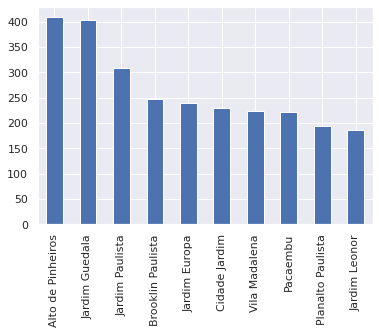

In [ ]:
bairros_top[:10].plot.bar()  # usando um slice para selecionar apenas os 10 primeiros em frequência e criar um gráfico

# Vinculação e tratamento dos dados do IBGE 


In [ ]:
# para fazer a ligação entre as bases de dados de imóveis e do ibge, precisamos de uma chave comum às duas
# vamos começar a fazer isso importando mais uma base, essa de endereços 
enderecos = pd.read_csv("/content/drive/MyDrive/Alura/imersao_dados_4/enderecos.csv")

In [ ]:
# essa base possui parte do necessário, endereço, e especialmente o nome do logradouro, além da latitude e longitude, úteis no futuro
enderecos.head()

,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude
0,Rua,Armando Silveira,Rua Armando Silveira,NaN,Divisa,Santana do Livramento,RS,97573200.00,-30.88,-55.55
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.00,-21.19,-50.45
2,Rua,Prefeito Agenor Barcelos Feio,Rua Prefeito Agenor Barcelos Feio,NaN,Registro,Santana do Livramento,RS,97571090.00,-30.86,-55.56
3,Rua,Sebastião Gomes,Rua Sebastião Gomes - até 59/60,59,Registro,Santana do Livramento,RS,97571374.00,-30.86,-55.55
4,Rua,Marquês do Alegrete,Rua Marquês do Alegrete,NaN,Parque das Águas,Santana do Livramento,RS,97571500.00,-30.86,-55.55


In [ ]:
# criando uma slice de enderecos só com o UF de SP
enderecos_sp = enderecos.query("sigla_uf == 'SP'")  # aspas dentro de aspas: SP precisa estar entre aspas simples por ser uma variável dentro do query
enderecos_sp

,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.00,-21.19,-50.45
413269,Rua,A,Rua A,NaN,Jardim Glória,Americana,SP,13468220.00,-22.76,-47.34
413270,Rua,A,Rua A,NaN,Jardim São Roque,Americana,SP,13469414.00,-22.74,-47.35
413271,Rua,A,Rua A,NaN,Iate Clube de Campinas,Americana,SP,13475620.00,-22.74,-47.33
413272,Rua,João Bandini,Rua João Bandini,NaN,Jardim Miriam,Americana,SP,13469072.00,-22.74,-47.35
...,...,...,...,...,...,...,...,...,...,...
1113858,Rua,Daniel Buccieri,Rua Daniel Buccieri,NaN,Jardim Alvorada,Monte Mor,SP,13198524.00,-22.93,-47.27
1113865,Rua,Ottorino Rizzi,Rua Ottorino Rizzi,NaN,Royal Park,Ribeirão Preto,SP,14028563.00,-21.24,-47.83
1113873,Rua,Adriano Michelutti Cândia,Rua Adriano Michelutti Cândia,NaN,Jardim San Marco II,Ribeirão Preto,SP,14035198.00,-21.20,-47.74
1113882,Rodovia,Mario Tonolli,Rodovia Mario Tonolli,NaN,Morro Alto,Itupeva,SP,13297002.00,-23.19,-47.08


In [ ]:
# para criar uma chave entre os dois dataframe de maneira prática, vamos usar o nome do logradouro
# então, criamos uma nova coluna com tipo e nome da rua apenas, e sem os números dos imóveis pois são muito erráticos, insconstantes, muitos nem aparecem nas bases de dados
enderecos_sp["rua"] = enderecos_sp["tipo_logr"] + " " + enderecos_sp["logr_nome"]  # nova coluna rua, feita concatenando as colunas tipo_logr e logr_nome
enderecos_sp["rua"] = enderecos_sp["rua"].str.lower().str.strip()  # deixando a string toda em letras minúsculas e removendo espaços desnecessários
enderecos_sp.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude,rua
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.00,-21.19,-50.45,rua joão antônio vasconcelos
413269,Rua,A,Rua A,NaN,Jardim Glória,Americana,SP,13468220.00,-22.76,-47.34,rua a
413270,Rua,A,Rua A,NaN,Jardim São Roque,Americana,SP,13469414.00,-22.74,-47.35,rua a
413271,Rua,A,Rua A,NaN,Iate Clube de Campinas,Americana,SP,13475620.00,-22.74,-47.33,rua a
413272,Rua,João Bandini,Rua João Bandini,NaN,Jardim Miriam,Americana,SP,13469072.00,-22.74,-47.35,rua joão bandini


In [ ]:
# extração do número das dos endereços da coluna Rua do dataframe dados, usando regex, coisa de maluco
dados["Rua"].str.extract(r'(^[\w ]+)')[:10]  # aqui removendo só os 10 primeiros para testar

,0
0,Avenida Itacira
1,Rua Aurelia Perez Alvarez
2,Rua Alba Valdez
3,NaN
4,Rua Tobias Barreto
5,Rua Graham Bell
6,Rua Francisco Paulo
7,Rua Guilherme Valente
8,Rua Sagrada Família
9,Rua Tapaji


In [ ]:
dados["Apenas_Rua"] = dados["Rua"].str.extract(r'(^[\w ]+)')  # resultado da extração numa nova coluna do dataframe
dados["Apenas_Rua"] = dados["Apenas_Rua"].str.lower().str.strip()  # limpando a string e deixando tudo minúsculo
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Modalidade,Valor_Milhoes,Preço m²,Apenas_Rua
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,Venda,7.00,7000.00,avenida itacira
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00,Venda,3.70,7459.68,rua aurelia perez alvarez
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00,Venda,0.38,3040.00,rua alba valdez
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685000.00,Venda,0.69,2209.68,NaN
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.00,Venda,0.54,5400.00,rua tobias barreto


In [ ]:
# o bicho pegando, o pd.merge fez a mescla das duas bases de dados, somente de algumas colunas de enderecos_sp, usando Apenas_Rua e rua como parâmetro chave 
# drop_duplicates ali foi complicadinha a explicação, mas isso removeu as linhas que eram criadas no merge por conta de várias delas terem latitude e longitude diferentes
# para cada logradouro, ou seja, se naquela área a "Rua X" tinha várias latitudes e longitudes, o merge ia criar várias entradas para essa "Rua X", essencialmente duplicadas 

dados_geo = pd.merge(left = dados, right = enderecos_sp[["rua", "cep", "latitude", "longitude"]], how = "left", left_on = "apenas_rua", right_on = "rua").drop_duplicates(subset=dados.columns).query("cep > 0")
dados_geo

NameError: ignored

## Polígonos e pontos

In [ ]:
# importando a biblioteca para criarmos formas poligonais e pontos referenciais
from shapely.geometry import Point, Polygon

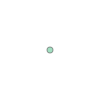

In [ ]:
# usando coordenadas para criar um ponto de referência
latitude = -23.56 	
longitude = -46.59
Point(longitude, latitude)

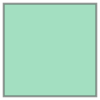

In [ ]:
# criando um polígono, um quadrado no caso
Polygon([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]])

In [ ]:
# verificando se Point está dentro da área do Polygon
Polygon([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]]).contains(Point(0.1,0.9))

True

## Geopandas

In [ ]:
!pip install geopandas

In [ ]:
# agora vamos usar o geopandas para ler arquivos georeferenciais
import geopandas as gpd

In [ ]:
# no drive temos 4 arquivos com as localizações, mas só precisamos informar o caminho do .shp para fazer a leitura dos dados
setor_censo = gpd.read_file('/content/drive/MyDrive/Alura/imersao_dados_4/35SEE250GC_SIR.shp')
setor_censo.head()

,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,CD_GEOCODB,NM_BAIRRO,ID1,geometry
0,98237.0,354100005000009,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,1,"POLYGON ((-46.41024 -24.01103, -46.41169 -24.0..."
1,98232.0,354100005000004,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,2,"POLYGON ((-46.41606 -24.00245, -46.41598 -24.0..."
2,98230.0,354100005000002,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,3,"POLYGON ((-46.41213 -24.00792, -46.41244 -24.0..."
3,98229.0,354100005000001,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,4,"POLYGON ((-46.41134 -24.00552, -46.41196 -24.0..."
4,98231.0,354100005000003,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,5,"POLYGON ((-46.41326 -24.00514, -46.41484 -24.0..."


## Tratando os dados geográficos

In [ ]:
# slices, primeiro selecionadno apenas a cidade de SP, depois uma coordernada específica (da sede da Alura)
setor_censo_sp = setor_censo[setor_censo.NM_MUNICIP == "SÃO PAULO"]
setor_censo_sp[setor_censo_sp.contains(Point(-46.63, -23.58))]

,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,CD_GEOCODB,NM_BAIRRO,ID1,geometry
60986,126568.0,355030890000080,URBANO,35503089000,None,355030890,VILA MARIANA,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,60987,"POLYGON ((-46.62618 -23.58169, -46.62863 -23.5..."


In [ ]:
# aqui estamos iterando as localizações, e inlcuindo cada uma delas numa nova coluna em dados_geo
dados_geo["Point"] = ""
for i in dados_geo.index:
    dados_geo["Point"][i] = Point(dados_geo["longitude"][i], dados_geo["latitude"][i])

# um slice dos 10 primeiros elementos de Point para não sei o que
dados_geo['setor_censo'] = dados_geo["Point"][:10].map(
    lambda x: setor_censo_sp.loc[setor_censo_sp.contains(x), 'CD_GEOCODI'].values
).str[0]
dados_geo

In [ ]:
# os professores já haviam deixado a base de dados pronta, pois rodar ela no loop anterior demora bastante
dados_geo = pd.read_csv("/content/drive/MyDrive/Alura/imersao_dados_4/dados_geo.csv")
dados_geo.head()

In [ ]:
rh2ps0dy# agora mais um merge, dessa vez entre os dados_geo que já tínhamos com a base do ibge, e temos chaves para
dados_censo = pd.merge(left = dados_geo, right = ibge_sp, how = "left", left_on = "setor_censo", right_on = "Cod_setor")
dados_censo

# Desafios

## Aula 1

### Desafio 1
Realizar a média da metragem para cada um dos bairros (Paulo)

In [ ]:
dados.groupby("Bairro")["Metragem"].mean()

Bairro
Aclimação           253.06
Alto da Boa Vista   418.88
Alto da Lapa        294.34
Alto da Mooca       270.05
Alto de Pinheiros   433.44
                     ...  
Vila Água Funda     152.20
Água Branca         191.00
Água Fria           165.42
Água Funda          139.00
Água Rasa           340.25
Name: Metragem, Length: 702, dtype: float64

### Desafio 2
Duas formas de selecionar os dados por bairro (consultar os métodos na documentação do pandas) (Thiago)

In [ ]:
bairro_selecionado = "Liberdade"

In [ ]:
dados.query("Bairro == @bairro_selecionado")  # usando query, busca todos as entradas da coluna Bairro que contem a variável 

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Modalidade
4025,Rua Teixeira Mendes,Liberdade,São Paulo,275,3,4,2,900000.00,Venda
4882,Rua Senador Felício dos Santos,Liberdade,São Paulo,600,3,1,4,2000000.00,Venda
5039,NaN,Liberdade,São Paulo,90,3,2,1,600000.00,Venda
5156,NaN,Liberdade,São Paulo,95,3,2,1,600000.00,Venda
5606,NaN,Liberdade,São Paulo,95,3,2,1,600000.00,Venda
5845,Rua Teixeira Mendes,Liberdade,São Paulo,180,4,2,2,750000.00,Venda
6367,Rua Teixeira Mendes,Liberdade,São Paulo,185,4,2,2,750000.00,Venda
7284,NaN,Liberdade,São Paulo,150,3,2,2,1040000.00,Venda


In [ ]:
dados.loc[dados["Bairro"] == bairro_selecionado]  # usando loc

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Modalidade
4025,Rua Teixeira Mendes,Liberdade,São Paulo,275,3,4,2,900000.00,Venda
4882,Rua Senador Felício dos Santos,Liberdade,São Paulo,600,3,1,4,2000000.00,Venda
5039,NaN,Liberdade,São Paulo,90,3,2,1,600000.00,Venda
5156,NaN,Liberdade,São Paulo,95,3,2,1,600000.00,Venda
5606,NaN,Liberdade,São Paulo,95,3,2,1,600000.00,Venda
5845,Rua Teixeira Mendes,Liberdade,São Paulo,180,4,2,2,750000.00,Venda
6367,Rua Teixeira Mendes,Liberdade,São Paulo,185,4,2,2,750000.00,Venda
7284,NaN,Liberdade,São Paulo,150,3,2,2,1040000.00,Venda


### Desafio 3 
Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, tentar colocar alguma conclusão (Thiago)

Text(0.5, 1.0, 'Histogramas variados')

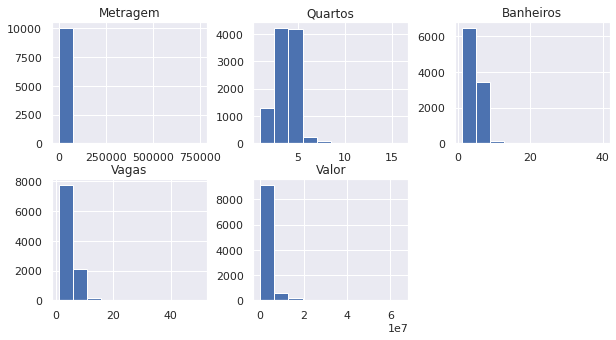

In [ ]:
dados.hist(figsize=(10,8), layout=(3,3), bins=10) # histogramas variados e sem sentido
plt.title('Histogramas variados')

Text(0.5, 1.0, 'Amostra de número de quartos')

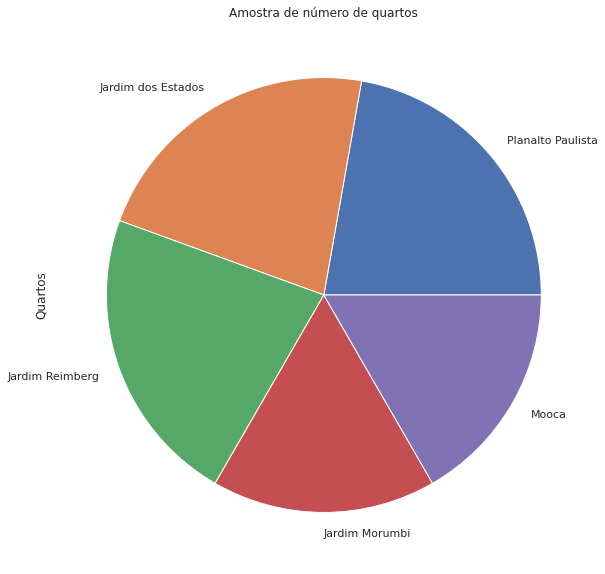

In [ ]:
dados.iloc[:5, [1 ,4]].set_index("Bairro").plot.pie(subplots = True, legend = False, figsize = (10,10))  # aqui um plot tosco feito com base no iloc, selecionando as 5 primeiras linhas do dataframe, depois as colunas 1 (Bairro) e 4 (Quartos), e tornando os bairros como índice
plt.title('Amostra de número de quartos')

Text(0.5, 1.0, 'Amostra de Média de Metragem de Bairros')

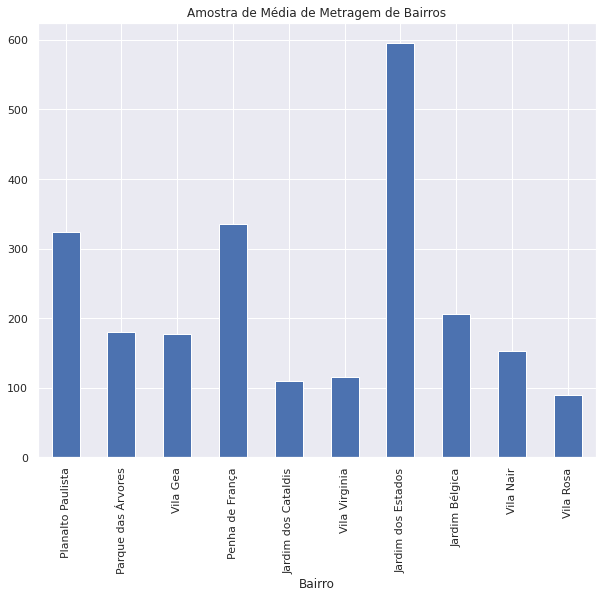

In [ ]:
dados.groupby("Bairro")["Metragem"].mean().sample(10).plot.bar(figsize=(10,8))
plt.title('Amostra de Média de Metragem de Bairros')

### Desafio 4
Pegar outros estatísticas dos dados, média, mediana, mim, max (Vivi)

In [ ]:
# mostrando os imóveis com maior metragem em cada bairro
# podemos trocar pelos métodos min() para menor metragem, mean() para média e std() para desvio padrão

dados.groupby("Bairro")["Metragem"].max().sort_values(ascending=False)

Bairro
Jardim Guedala                        750000
Sítio Represa                          37000
Jardim da Glória                       35677
Santo Amaro                             7126
Vila Castelo                            2850
                                       ...  
Cidade Antônio Estevão de Carvalho        60
Jardim Nova Germania                      57
Jardim Benfica                            48
Vila Leonor                               46
Vila Guaca                                10
Name: Metragem, Length: 702, dtype: int64

### Desafio 5
Descobrir quais são os bairros que não tem nome de Rua. (Vivi)

In [ ]:
dados["Rua"].isnull().value_counts()  # quantidade de valores nulos que existem em Rua

False    6574
True     3434
Name: Rua, dtype: int64

In [ ]:
dados[dados["Rua"].isnull()]["Bairro"].value_counts()  # fazendo um slice de dados["Rua"] dentro de dados e então um slice de Bairro, sintaxe estranha, mas funcionando, creio, e então contando quantas ruas sem informação há em cada bairro

Jardim Guedala                      190
Alto de Pinheiros                   169
Jardim Paulista                     138
Jardim Europa                       128
Jardim Leonor                       118
                                   ... 
Jardim do Colégio (Zona Norte)        1
Alto da Boa Vista                     1
Jardim Aeroporto                      1
Conjunto Residencial Vista Verde      1
Jardim Santo Elias                    1
Name: Bairro, Length: 394, dtype: int64

In [ ]:
# importação anterior é cheia de problemas, é necessário tratar na leitura inicial
ibge.head()

,,,,,,,,,,Cod_setor;Cod_Grandes Regi�es;Nome_Grande_Regiao;Cod_UF;Nome_da_UF ;Cod_meso;Nome_da_meso;Cod_micro;Nome_da_micro;Cod_RM;Nome_da_RM;Cod_municipio;Nome_do_municipio;Cod_distrito;Nome_do_distrito;Cod_subdistrito;Nome_do_subdistrito;Cod_bairro;Nome_do_bairro;Situacao_setor;Tipo_setor;V001;V002;V003;V004;V005;V006;V007;V008;V009;V010;V011;V012;
"355030801000001;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030801;""�GUA RASA"";35503080100;""�GUA RASA"";3550308000;""S�O PAULO (todos os setores)"";1;0;266;800;3",01;2,32;2091,32;8532451,78;2164,55;8673276,78;1227,41;4285771,99;1713,75;5152087,86.00
"355030801000002;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030801;""�GUA RASA"";35503080100;""�GUA RASA"";3550308000;""S�O PAULO (todos os setores)"";1;0;306;913;2",98;2,09;1650,09;3983441,31;1717,44;4030519,99;1045,78;2572133,32;1468,08;2991546,94.00
"355030801000003;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030801;""�GUA RASA"";35503080100;""�GUA RASA"";3550308000;""S�O PAULO (todos os setores)"";1;0;189;625;3",31;3,08;1280,43;5474593,06;2349,53;7553913,02;902,97;2735492,52;1786,79;3837674,74.00
"355030801000004;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030801;""�GUA RASA"";35503080100;""�GUA RASA"";3550308000;""S�O PAULO (todos os setores)"";1;0;181;572;3",16;2,26;1119,59;3572955,1;1859,13;4567289,5;869,09;2122409,02;1567,41;2735383,24.00
"355030801000005;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030801;""�GUA RASA"";35503080100;""�GUA RASA"";3550308000;""S�O PAULO (todos os setores)"";1;0;240;754;3",14;2,35;1416,9;2240207,58;1581,66;2240109,39;917,71;1570047,75;1356,35;1725877,85.00


In [ ]:
ibge_sp = pd.read_csv(
    'https://gist.githubusercontent.com/tgcsantos/85f8c7b0a2edbc3e27fcad619b37d886/raw/a4954781e6bca9cb804062a3eea0b3b84679daf4/Basico_SP1.csv',
    encoding='ISO-8859-1',  # encoding bizarro
    sep=';', thousands='.', decimal=','  # definindo um separador diferente do padrão, e já acertando os separadores para milhar e decimal para nossa realidade 
)
ibge_sp.dropna(how='all', axis=1, inplace=True)  # vai dropar a coluna se todas as colunas tiverem iguais a vazio
ibge_sp.head()

,Cod_setor,Cod_Grandes Regiï¿½es,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,355030801000001,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.01,2.32,2091.32,8532451.78,2164.55,8673276.78,1227.41,4285771.99,1713.75,5152087.86
1,355030801000002,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,2.98,2.09,1650.09,3983441.31,1717.44,4030519.99,1045.78,2572133.32,1468.08,2991546.94
2,355030801000003,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.31,3.08,1280.43,5474593.06,2349.53,7553913.02,902.97,2735492.52,1786.79,3837674.74
3,355030801000004,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.16,2.26,1119.59,3572955.10,1859.13,4567289.50,869.09,2122409.02,1567.41,2735383.24
4,355030801000005,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.14,2.35,1416.90,2240207.58,1581.66,2240109.39,917.71,1570047.75,1356.35,1725877.85


In [ ]:
ibge_sp.info()  # muitas colunas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18363 entries, 0 to 18362
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Cod_setor              18363 non-null  int64  
 1   Cod_Grandes Regiï¿½es  18363 non-null  int64  
 2   Nome_Grande_Regiao     18363 non-null  object 
 3   Cod_UF                 18363 non-null  int64  
 4   Nome_da_UF             18363 non-null  object 
 5   Cod_meso               18363 non-null  int64  
 6   Nome_da_meso           18363 non-null  object 
 7   Cod_micro              18363 non-null  int64  
 8   Nome_da_micro          18363 non-null  object 
 9   Cod_RM                 18363 non-null  int64  
 10  Nome_da_RM             18363 non-null  object 
 11  Cod_municipio          18363 non-null  int64  
 12  Nome_do_municipio      18363 non-null  object 
 13  Cod_distrito           18363 non-null  int64  
 14  Nome_do_distrito       18363 non-null  object 
 15  Co

## Aula 2

### Desafio 1
Criar uma escala de valores em milhões

In [ ]:
dados["Valor_Milhoes"] = dados["Valor"]/1000000  # criando uma nova coluna de Valores de Milhões, e incluindo nela o Valor dividido por 1 milhão
dados.sample(5)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Modalidade,Valor_Milhoes
2572,NaN,Jardim Leonor,São Paulo,700,5,7,16,20000.00,Aluguel Mensal,0.02
2766,NaN,Jardim Guedala,São Paulo,552,3,4,3,2500000.00,Venda,2.50
3727,Rua Doutor Queirós Guimarães,Jardim Guedala,São Paulo,402,4,6,5,12000.00,Aluguel Mensal,0.01
6545,NaN,Parque Imperial,São Paulo,120,2,3,3,600000.00,Venda,0.60
8491,Rua José Alencar Castelo Branco,Siciliano,São Paulo,229,3,3,3,2200000.00,Venda,2.20


### Desafio 2


(-0.5, 50.0)

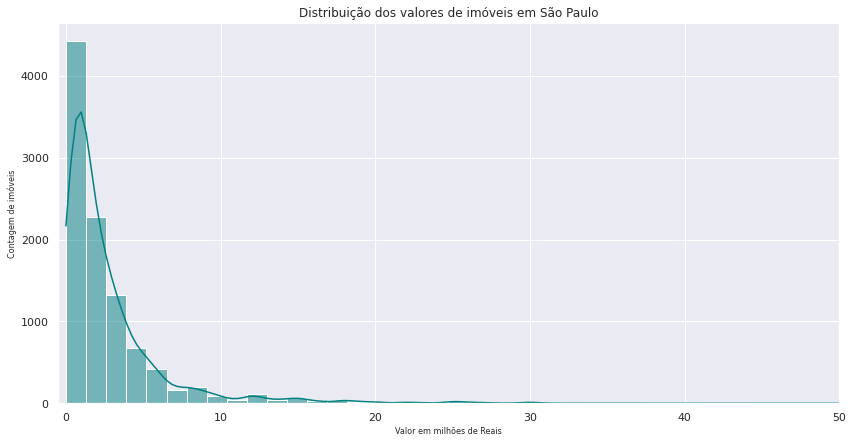

In [ ]:
plt.figure(figsize=(14, 7))
sns.histplot(data = dados, x = "Valor_Milhoes", kde = True, bins = 50, color = "teal")
plt.xlabel('Valor em milhões de Reais', fontsize=8)
plt.ylabel('Contagem de imóveis', fontsize=8)
plt.title('Distribuição dos valores de imóveis em São Paulo', fontsize=12)
plt.xlim((-0.5, 50))

### Desafio 3
Preço do metro quadrado por bairro e plotar em um gráfico ideal

In [ ]:
dados["Preço m²"] = dados["Valor"] / dados["Metragem"]  # obtendo o preço por m² de cada imóvel e incluindo uma nova coluna do dataframe

preco_m2 = dados.groupby("Bairro")["Preço m²"].mean().to_frame().reset_index().sort_values(by = "Preço m²", ascending = False)  # criando um novo dataframe agrupado pelos Bairros, com a média do preço por m², resetando o index e ordenando pelo mais caro

preco_m2.head(10)

,Bairro,Preço m²
530,Vila Guaca,80000.00
102,Jardim Ampliação,20051.04
157,Jardim Europa,17476.20
279,Jardim Teresa,17465.56
104,Jardim América,16981.40
601,Vila Nova Conceição,15319.68
194,Jardim Luzitânia,14713.48
95,Itaim Bibi,14235.40
229,Jardim Paulista,13857.26
193,Jardim Luanda,12450.59


Text(0.5, 1.0, 'Preço por m² dos bairros de São Paulo')

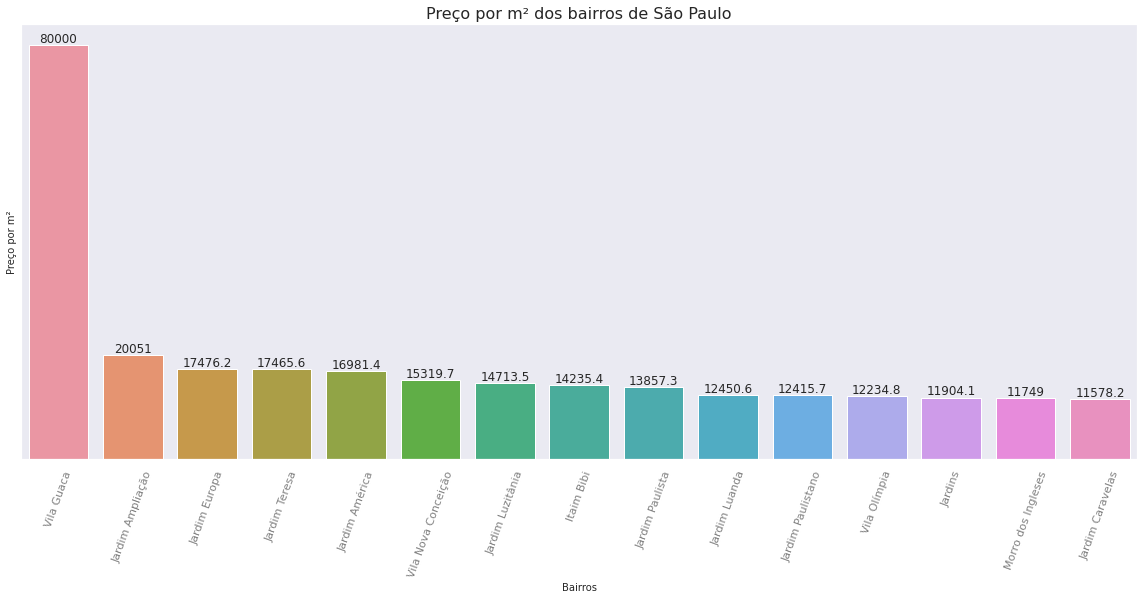

In [ ]:
plt.figure(figsize = (20, 8))
ax = sns.barplot(data = preco_m2.head(15), x = "Bairro", y = "Preço m²")
ax.bar_label(ax.containers[0], label_type='edge') # colocando labels com os valores, o ax.containers[0] é o default do método, não pesquisei muito sobre ele
# ax.get_yaxis().set_visible(False) usar esse remove todo o eixo y, até o label
ax.get_yaxis().set_ticks([]) # deixando os ticks do eixo y vaizos, ou seja, sem os números
plt.tick_params(colors = "gray", rotation = 70) # alterando parâmetros dos ticks e inclinando em 70 graus
plt.xlabel('Bairros', fontsize = 10)
plt.ylabel('Preço por m²', fontsize = 10)
plt.title("Preço por m² dos bairros de São Paulo", fontsize = 16)

### Desafio 4
Explorar as bibliotecas de visualizações e colocar as suas conclusões

In [ ]:
# squarify para criar treemaps, não é padrão, precisa ser instalado
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import squarify

<AxesSubplot:>

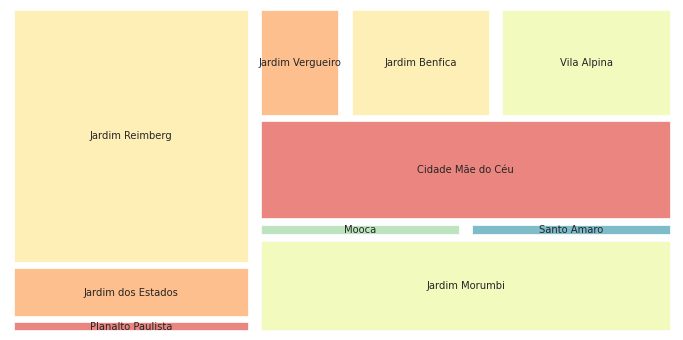

In [ ]:
# um treemap com amostras aleatórias da contagem da quantidade de ocorrências de cada bairro no dataframe

plt.figure(figsize=(12, 6))
plt.axis("off")  # para remover os eixos numéricos, meio que inúteis nesse gráfico
squarify.plot(sizes = dados["Bairro"].value_counts().sample(10), 
              color = sns.color_palette("Spectral"), 
              label = dados["Bairro"],
              pad = 1,
              text_kwargs={'fontsize': 10},
              alpha = .7)


### Desafio 5
Pesquisar um visualização para analisar os quartis, mediana e outliers

In [ ]:
# contando os valores dos 10 bairros que mais ocorrem no dataframe e criando um índice desses bairros
bairro_top = dados["Bairro"].value_counts()[:10].index
bairro_top

Index(['Alto de Pinheiros', 'Jardim Guedala', 'Jardim Paulista',
       'Brooklin Paulista', 'Jardim Europa', 'Cidade Jardim', 'Vila Madalena',
       'Pacaembu', 'Planalto Paulista', 'Jardim Leonor'],
      dtype='object')

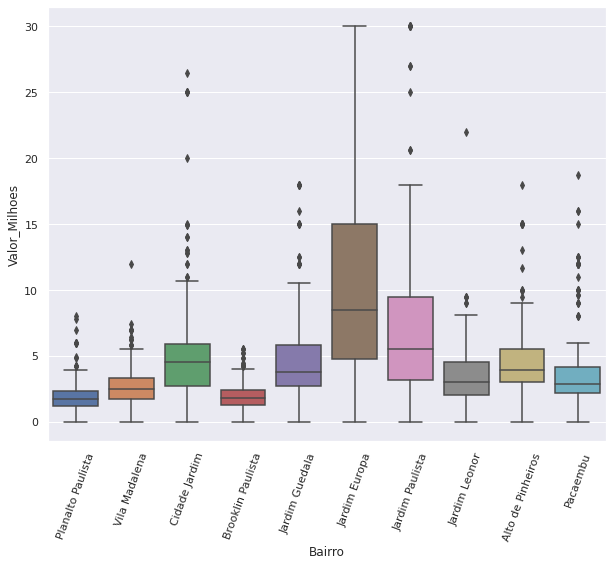

In [ ]:
# usando boxplot, conseguimos verificar a divisão dos quartis no gráfico. A primeira linha da caixa mostra 25%, a do meio é a mediana e a última são 75%.
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data = dados.query("Bairro in @bairro_top & Valor_Milhoes <= 30"), x = "Bairro", y = "Valor_Milhoes")  # usando query para inlcuir mais condições na pesquisa
ax.tick_params(axis = "x", rotation = 70)
plt.show()

## Aula 3

### Desafio 1
Tentar vincular dados do IBGE com os dados de imóveis

In [ ]:
# Realizado no tópico "Vinculação e tratamento dos dados do IBGE"

### Desafio 2
Tratar os outliers e comparar com os resultados


### Desafio 3
Agrupar por mais de uma categoria e realizar as análises

### Desafio 4
Organize o colab para deixar com cara de projeto

In [ ]:
# já sendo feito neste notebook

## Aula 4

### Desafio 1
Realizar uma análise dos dados do IBGE por mapa, analisando a distribuição de renda (https://medium.com/creditas-tech/dados-georreferenciados-explora%C3%A7%C3%A3o-e-visualiza%C3%A7%C3%A3o-com-python-edd51e7c53da)

### Desafio 2
Repassar a aula para entender melhor o que foi realizado

### Desafio 3
Aprofundar a análise entre dados de vendas e renda

### Desafio 4
Realizar a análise exploratória e encontrar variáveis relevantes para solução do problema

## Aula 5

### Desafio 1


### Desafio 2


### Desafio 3

### Desafio 4